In [6]:
from sklearn.ensemble import RandomForestRegressor
from pandas import Timestamp
from functools import partial
import matplotlib.pyplot as plt
import sys
sys.path.append('..')
from src.helpers import get_data, clean_data, split_data, train_model, load_model, predict
%matplotlib inline

In [7]:
train_set = get_data('../data/raw/train_set.csv')
train_set.head()

,created_at,site,pm2_5,pm10,s2_pm2_5,s2_pm10,humidity,temp,lat,long,altitude,greenness,landform_90m,landform_270m,population,dist_major_road,ref_pm2_5
0,2019-12-02 08:00:00+03:00,USEmbassy,74.088667,83.767111,0.000000,0.000000,0.962917,21.475000,0.299255,32.592686,1199,4374,21,14,6834,130,95.0
1,2020-03-17 02:00:00+03:00,USEmbassy,88.350233,96.003023,86.993256,107.929767,0.967667,19.233333,0.299255,32.592686,1199,4374,21,14,6834,130,139.0
2,2019-10-13 05:00:00+03:00,USEmbassy,47.540513,58.672308,48.684103,60.505128,0.999250,18.916667,0.299255,32.592686,1199,4374,21,14,6834,130,46.0
3,2020-04-04 11:00:00+03:00,USEmbassy,24.567619,27.151429,23.406667,27.316429,0.783500,25.475000,0.299255,32.592686,1199,4374,21,14,6834,130,33.0
4,2020-03-22 20:00:00+03:00,USEmbassy,46.644857,57.555143,46.195143,60.075714,0.721833,22.916667,0.299255,32.592686,1199,4374,21,14,6834,130,60.0


In [8]:
train_set = clean_data(train_set)
train_set.head()

,pm2_5,pm10,s2_pm2_5,s2_pm10,humidity,temp,lat,long,altitude,greenness,landform_270m,population,ref_pm2_5,hour_of_day
0,74.088667,83.767111,74.088667,83.767111,0.962917,21.475000,0.299255,32.592686,1199,4374,14,6834,95.0,8
1,88.350233,96.003023,86.993256,107.929767,0.967667,19.233333,0.299255,32.592686,1199,4374,14,6834,139.0,2
2,47.540513,58.672308,48.684103,60.505128,0.999250,18.916667,0.299255,32.592686,1199,4374,14,6834,46.0,5
3,24.567619,27.151429,23.406667,27.316429,0.783500,25.475000,0.299255,32.592686,1199,4374,14,6834,33.0,11
4,46.644857,57.555143,46.195143,60.075714,0.721833,22.916667,0.299255,32.592686,1199,4374,14,6834,60.0,20


In [9]:
X = train_set.drop(columns = ['ref_pm2_5'], axis=1)
y = train_set['ref_pm2_5']

In [10]:
Xtrain, Xtest, ytrain, ytest = split_data(X, y)

In [11]:
#loading model from GridSearchCV
rfr = load_model('../models/rfr_grid_search.joblib')

In [12]:
train_model(rfr, Xtrain, ytrain)

In [13]:
rmse, ypred = predict(rfr, Xtest, ytest)
rmse

13.14

#### Testing on held-out data

In [14]:
Xactual = get_data('../data/raw/test_set.csv')
Xactual.head()

,created_at,site,pm2_5,pm10,s2_pm2_5,s2_pm10,humidity,temp,lat,long,altitude,greenness,landform_90m,landform_270m,population,dist_major_road
0,2020-03-20 12:00:00+03:00,USEmbassy,9.903636,10.259545,8.852727,10.097727,0.748000,26.491667,0.299255,32.592686,1199,4374,21,14,6834,130
1,2019-10-12 06:00:00+03:00,USEmbassy,38.428333,45.940714,40.087143,48.159762,0.995000,18.225000,0.299255,32.592686,1199,4374,21,14,6834,130
2,2019-12-13 17:00:00+03:00,USEmbassy,13.278000,14.967333,0.000000,0.000000,0.687500,24.891667,0.299255,32.592686,1199,4374,21,14,6834,130
3,2019-11-13 09:00:00+03:00,USEmbassy,36.304000,40.366750,89.182500,93.572500,0.868417,22.616667,0.299255,32.592686,1199,4374,21,14,6834,130
4,2019-08-07 19:00:00+03:00,USEmbassy,56.686410,67.412308,55.048974,66.089487,0.782083,23.350000,0.299255,32.592686,1199,4374,21,14,6834,130


In [15]:
Xactual = clean_data(Xactual)
Xactual.head()

,pm2_5,pm10,s2_pm2_5,s2_pm10,humidity,temp,lat,long,altitude,greenness,landform_270m,population,hour_of_day
0,9.903636,10.259545,8.852727,10.097727,0.748000,26.491667,0.299255,32.592686,1199,4374,14,6834,12
1,38.428333,45.940714,40.087143,48.159762,0.995000,18.225000,0.299255,32.592686,1199,4374,14,6834,6
2,13.278000,14.967333,13.278000,14.967333,0.687500,24.891667,0.299255,32.592686,1199,4374,14,6834,17
3,36.304000,40.366750,89.182500,93.572500,0.868417,22.616667,0.299255,32.592686,1199,4374,14,6834,9
4,56.686410,67.412308,55.048974,66.089487,0.782083,23.350000,0.299255,32.592686,1199,4374,14,6834,19


In [16]:
yactual = get_data('../data/raw/test_solution.csv')
yactual.head()

,ref_pm2_5
0,30.0
1,44.0
2,27.0
3,48.0
4,57.0


In [18]:
rmse_heldout, ypred_heldout = predict(rfr, Xactual, yactual)
rmse_heldout

13.1

Text(0, 0.5, 'Predictions ')

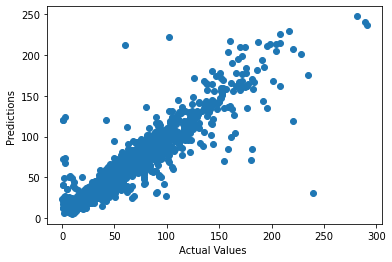

In [19]:
g=plt.scatter(yactual, ypred_heldout)
g.axes.set_xlabel('Actual Values ')
g.axes.set_ylabel('Predictions ')

In [20]:
ytest.shape, ypred.shape

((4920,), (4920,))

In [21]:
y_df = Xtest[['pm2_5', 'pm10', 'altitude', 'hour_of_day']]
y_df.head()

,pm2_5,pm10,altitude,hour_of_day
533,2.587381,2.745000,1199,4
3883,21.706000,23.131333,1199,11
932,30.479333,34.863333,1233,19
6946,197.810682,218.537273,1191,7
4439,23.544667,25.238222,1199,16


In [22]:
y_df['ref_pm2_5'] = ytest
y_df.head()

d:\airqo\airqo-platform\airqo-experiments\calibration_rf_l\env\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


,pm2_5,pm10,altitude,hour_of_day,ref_pm2_5
533,2.587381,2.745000,1199,4,19.0
3883,21.706000,23.131333,1199,11,35.0
932,30.479333,34.863333,1233,19,23.7
6946,197.810682,218.537273,1191,7,179.3
4439,23.544667,25.238222,1199,16,44.0


In [23]:
y_df['ypred'] = ypred
y_df.head()

d:\airqo\airqo-platform\airqo-experiments\calibration_rf_l\env\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


,pm2_5,pm10,altitude,hour_of_day,ref_pm2_5,ypred
533,2.587381,2.745000,1199,4,19.0,18.337436
3883,21.706000,23.131333,1199,11,35.0,36.732069
932,30.479333,34.863333,1233,19,23.7,23.630794
6946,197.810682,218.537273,1191,7,179.3,186.394831
4439,23.544667,25.238222,1199,16,44.0,33.415501


In [24]:
y_df['diff_ref'] = abs(y_df['ref_pm2_5'] - y_df['ypred'])
y_df['diff2_lc'] = abs(y_df['ref_pm2_5'] - y_df['pm2_5'])
y_df.head()

d:\airqo\airqo-platform\airqo-experiments\calibration_rf_l\env\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
d:\airqo\airqo-platform\airqo-experiments\calibration_rf_l\env\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


,pm2_5,pm10,altitude,hour_of_day,ref_pm2_5,ypred,diff_ref,diff2_lc
533,2.587381,2.745000,1199,4,19.0,18.337436,0.662564,16.412619
3883,21.706000,23.131333,1199,11,35.0,36.732069,1.732069,13.294000
932,30.479333,34.863333,1233,19,23.7,23.630794,0.069206,6.779333
6946,197.810682,218.537273,1191,7,179.3,186.394831,7.094831,18.510682
4439,23.544667,25.238222,1199,16,44.0,33.415501,10.584499,20.455333


In [25]:
y_df.to_csv(r'../data/raw/actual_vs_pred.csv', index=False)

In [26]:
diff_df = y_df[(y_df['diff_ref']>=50)]
diff_df.shape

(65, 8)

In [27]:
diff_df

,pm2_5,pm10,altitude,hour_of_day,ref_pm2_5,ypred,diff_ref,diff2_lc
6987,42.506765,52.645000,1191,22,147.2,27.382595,119.817405,104.693235
6728,101.246364,110.517045,1191,2,0.1,95.739233,95.639233,101.146364
7300,40.124474,49.855000,1191,18,109.7,57.049531,52.650469,69.575526
5065,60.683023,71.993488,1191,2,2.6,54.278714,51.678714,58.083023
7336,113.693256,124.165116,1191,23,1.4,112.814903,111.414903,112.293256
...,...,...,...,...,...,...,...,...
5106,52.800909,90.825000,1199,11,197.0,144.448196,52.551804,144.199091
4368,54.590000,67.716750,1191,6,0.4,50.716438,50.316438,54.190000
1867,103.015227,110.878182,1199,9,186.0,108.693153,77.306847,82.984773
734,57.267895,65.202105,1191,13,128.8,63.013249,65.786751,71.532105


In [28]:
diff_df['altitude'].value_counts()

1191    39
1199    21
1233     5
Name: altitude, dtype: int64